# **DS605: Fundamental of Machine Learning Project-2**  
# **Cardiovascular Disease Detection Using Classification**  

---

# Kashyap Shingala - 202418052
# Jash Virani - 202418061  
# Viraj Modi - 202418060
# Hardik Bharvada - 202418010  

## Problem Statement : Classificing Cardiovascular Disease Risk

Objective:
The primary objective of this project is to develop a predictive model that can accurately identify individuals at risk of cardiovascular disease (CVD) based on various health-related features. This model aims to assist healthcare professionals in early diagnosis and intervention strategies to reduce the prevalence of cardiovascular diseases.

Data Description:
The dataset includes features such as age, gender, height, weight, blood pressure (systolic and diastolic), cholesterol levels, glucose levels, smoking and alcohol consumption habits, physical activity level, to classify whether the individual has cardiovascular disease (target variable).


## Pseudocode for Cardiovascular Disease Classification

Step 1: Load Data  
Load data from CSV file into DataFrame df

Step 2: Data Cleaning and Preprocessing  
DROP 'id' column from df
Convert 'weight' from pounds to kilograms
Convert 'height' from feet to centimeters
Convert 'age' from days to years

Step 3: Remove Outliers  
Remove rows where height or weight are outside the 0.5% and 99.5% quantiles
Remove rows where diastolic pressure is higher than systolic pressure
Remove rows where blood pressure values are negative

Step 4: Calculate BMI  
CALCULATE BMI as weight in kg divided by (height in meters)² 
And remove rows where BMI is outside the 1% and 99% quantiles i.e. Noise

Step 5: Encode Categorical Variables  
USE LabelEncoder to Convert categorical variables (gender, cholesterol, gluc, smoke, alco, active) to numerical

Step 6: Exploratory Data Analysis  
Create histograms for weight, height, age, and BMI
Create count plots for categorical variables against 'cardio'
Create box plots for age versus cardio
Create correlation heatmap of features

Step 7: Prepare Data for Modeling  
Split data into features X and target y
Split data into training and testing sets (80% training, 20% testing)

Step 8: Define Model Pipelines  
Define numerical columns for scaling
Define preprocessor using StandardScaler for numerical columns
Define classifiers: RandomForest, LogisticRegression, KNeighbors, etc.
Define ensemble classifiers: Using ensemblimg techniques like bagging, pasting, and models like adaboost, xgboost, softvoting, etc

Step 9: Hyperparameter Tuning with GridSearchCV  
Apply GridSearchCV to find best hyperparameters for RandomForest, LogisticRegression, KNN
Print best parameters and scores for each model

Step 10: Model Evaluation  
For each model in classifiers:
    Fit model on training data
    Predict on testing data
    Caalculate accuracy, confusion matrix, precision, recall, F1 score
    Print evaluation metrics


## Data Scraping and Pre-processing

We have scrapped the data from Kaggle.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating DataFrame
df = pd.read_csv(r"D:\down\cardio_data.csv")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,Men,5.511811,136.68644,110,80,normal,normal,not smoking,not drinking,active,not present
1,1,20228,Women,5.118110,187.39270,140,90,well above normal,normal,not smoking,not drinking,active,present
2,2,18857,Women,5.413386,141.09568,130,70,well above normal,normal,not smoking,not drinking,not active,present
3,3,17623,Men,5.544620,180.77884,150,100,normal,normal,not smoking,not drinking,active,present
4,4,17474,Women,5.118110,123.45872,100,60,normal,normal,not smoking,not drinking,not active,not present
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,Men,5.511811,167.55112,120,80,normal,normal,smoking,not drinking,active,not present
69996,99995,22601,Women,5.183727,277.78212,140,90,above normal,above normal,not smoking,not drinking,active,present
69997,99996,19066,Men,6.003937,231.48510,180,90,well above normal,normal,not smoking,drinking,not active,present
69998,99998,22431,Women,5.347769,158.73264,135,80,normal,above normal,not smoking,not drinking,not active,present


In [37]:
# Dropping unnecessary columns
df.drop(['id'], axis=1, inplace=True)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,Men,5.511811,136.68644,110,80,normal,normal,not smoking,not drinking,active,not present
1,20228,Women,5.118110,187.39270,140,90,well above normal,normal,not smoking,not drinking,active,present
2,18857,Women,5.413386,141.09568,130,70,well above normal,normal,not smoking,not drinking,not active,present
3,17623,Men,5.544620,180.77884,150,100,normal,normal,not smoking,not drinking,active,present
4,17474,Women,5.118110,123.45872,100,60,normal,normal,not smoking,not drinking,not active,not present
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,Men,5.511811,167.55112,120,80,normal,normal,smoking,not drinking,active,not present
69996,22601,Women,5.183727,277.78212,140,90,above normal,above normal,not smoking,not drinking,active,present
69997,19066,Men,6.003937,231.48510,180,90,well above normal,normal,not smoking,drinking,not active,present
69998,22431,Women,5.347769,158.73264,135,80,normal,above normal,not smoking,not drinking,not active,present


In [38]:
# Shape of DataFrame
df.shape

(70000, 12)

In [39]:
# Accesing which columns are present
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [40]:
# 5 point summary
df.describe()

,age,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,5.392363,163.595348,128.817286,96.630414
std,2467.251667,0.269361,31.737173,154.011419,188.472530
min,10798.000000,1.804462,22.046200,-150.000000,-70.000000
25%,17664.000000,5.216536,143.300300,120.000000,80.000000
50%,19703.000000,5.413386,158.732640,120.000000,80.000000
75%,21327.000000,5.577428,180.778840,140.000000,90.000000
max,23713.000000,8.202100,440.924000,16020.000000,11000.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  object 
 2   height       70000 non-null  float64
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  object 
 7   gluc         70000 non-null  object 
 8   smoke        70000 non-null  object 
 9   alco         70000 non-null  object 
 10  active       70000 non-null  object 
 11  cardio       70000 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 6.4+ MB


In [42]:
# Checking duplicates
df.duplicated().sum()

24

In [43]:
df[df.duplicated()]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
10562,20495,Women,5.413386,154.32340,120,80,normal,normal,not smoking,not drinking,active,not present
21784,16793,Women,5.413386,149.91416,120,80,normal,normal,not smoking,not drinking,active,not present
38505,18988,Women,5.380578,143.30030,120,80,normal,normal,not smoking,not drinking,active,not present
40365,14552,Women,5.183727,141.09568,120,80,normal,normal,not smoking,not drinking,active,not present
42450,18353,Women,5.544620,147.70954,120,80,normal,normal,not smoking,not drinking,active,not present
44653,16937,Men,5.577428,154.32340,120,80,normal,normal,not smoking,not drinking,not active,not present
45125,21280,Women,5.413386,143.30030,120,80,normal,normal,not smoking,not drinking,active,not present
45748,22077,Women,5.741470,152.11878,120,80,normal,normal,not smoking,not drinking,active,present
45810,21230,Women,5.380578,136.68644,120,80,normal,normal,not smoking,not drinking,active,not present
48917,21945,Women,5.413386,132.27720,120,80,normal,normal,not smoking,not drinking,active,not present


Since all these are different, So no dupliactes are present

In [44]:
# Null values
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Data Pre-processing

In [45]:
# Converting weights in pounds(lbs) to kilogram(kg)
df['weight'] = df['weight'] * 0.453592
df['weight'] = df['weight'].round(2)

# Converting height in feet to centimeter(cm)
df['height'] = df['height'] * 2.54 * 12
df['height'] = df['height'].round().astype('int')

# Converting age from days to years
df['age'] = (df['age'] / 365).round().astype('int')
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,Men,168,62.0,110,80,normal,normal,not smoking,not drinking,active,not present
1,55,Women,156,85.0,140,90,well above normal,normal,not smoking,not drinking,active,present
2,52,Women,165,64.0,130,70,well above normal,normal,not smoking,not drinking,not active,present
3,48,Men,169,82.0,150,100,normal,normal,not smoking,not drinking,active,present
4,48,Women,156,56.0,100,60,normal,normal,not smoking,not drinking,not active,not present
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53,Men,168,76.0,120,80,normal,normal,smoking,not drinking,active,not present
69996,62,Women,158,126.0,140,90,above normal,above normal,not smoking,not drinking,active,present
69997,52,Men,183,105.0,180,90,well above normal,normal,not smoking,drinking,not active,present
69998,61,Women,163,72.0,135,80,normal,above normal,not smoking,not drinking,not active,present


If we look more closely to height and weight columns, we will notice that minimum height is 55 cm and minimum weight is 10 kg. That has to be an error, since minimum age is 10798 days, which equals to 29 years. On the other hand, the maximum height is 250 cm and the highest weight is 200 kg, which might be irrelevant, when generilizing data. To deal with these errors, we can remove outliers.

In [46]:
df.describe()

,age,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,164.359229,74.205690,128.817286,96.630414
std,6.765294,8.210126,14.395757,154.011419,188.472530
min,30.000000,55.000000,10.000000,-150.000000,-70.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000
50%,54.000000,165.000000,72.000000,120.000000,80.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000
max,65.000000,250.000000,200.000000,16020.000000,11000.000000


In [47]:
# Let's remove weights and heights, that fall below .5% or above 99.5% of a given range.

df.drop(df[(df['height'] > df['height'].quantile(0.995)) | (df['height'] < df['height'].quantile(0.005))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.995)) | (df['weight'] < df['weight'].quantile(0.005))].index,inplace=True)
# In addition, in some cases diastolic pressure is higher than systolic, which is also incorrect. How many records are inaccurate in terms of blood pressure?

print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))
# Let's get rid of the outliers, moreover blood pressure could not be negative value!

df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

Diastilic pressure is higher than systolic one in 1201 cases


In [48]:
df.shape

(65169, 12)

## EDA and Feature Engineering

## Univariate Analysis

In [49]:
# 5 point summary
df.describe()

,age,height,weight,ap_hi,ap_lo
count,65169.000000,65169.000000,65169.000000,65169.000000,65169.000000
mean,53.362519,164.494622,73.896503,126.231230,81.178689
std,6.755646,7.534686,13.290519,14.425543,8.388860
min,30.000000,144.000000,45.000000,100.000000,60.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000
50%,54.000000,165.000000,72.000000,120.000000,80.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000
max,65.000000,186.000000,125.000000,170.000000,100.000000


<Axes: xlabel='weight', ylabel='Count'>

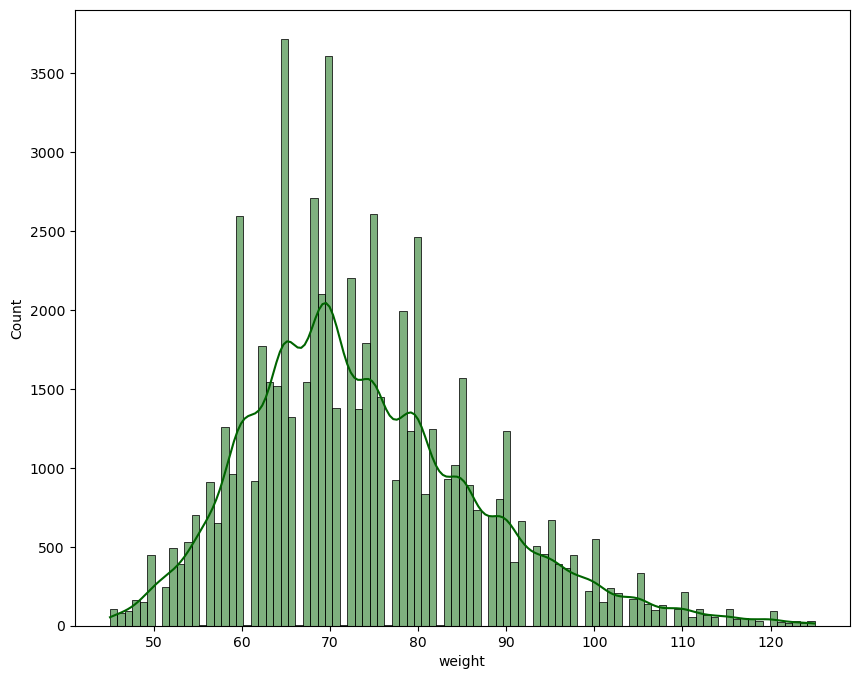

In [50]:
# Distribution of weight
plt.figure(figsize=(10,8))
sns.histplot(x='weight', data = df, color = 'darkgreen', kde = True)

<Axes: xlabel='height', ylabel='Count'>

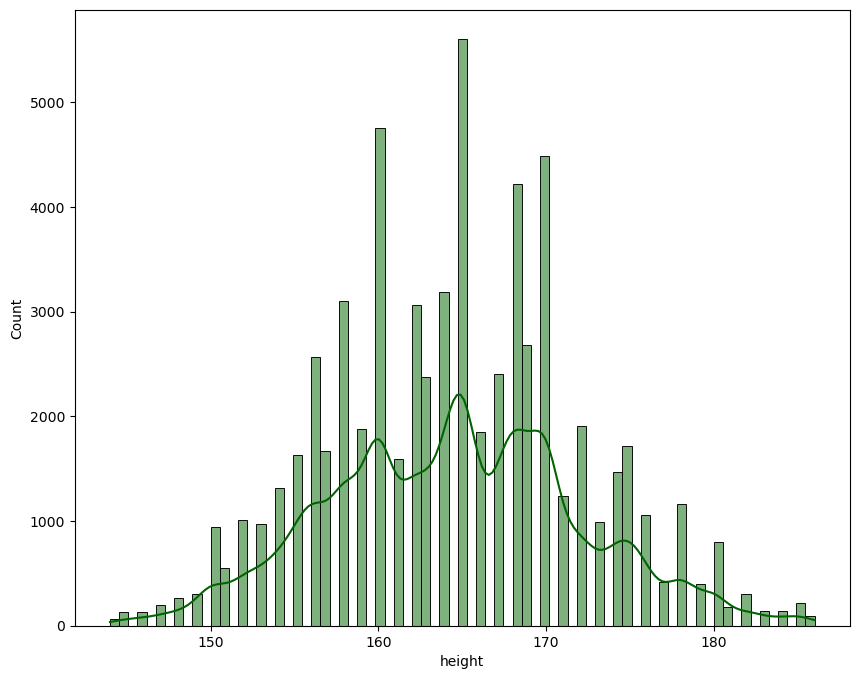

In [51]:
# Distribution of height
plt.figure(figsize=(10,8))
sns.histplot(x='height', data = df, color = 'darkgreen', kde = True)

<Axes: xlabel='age', ylabel='Count'>

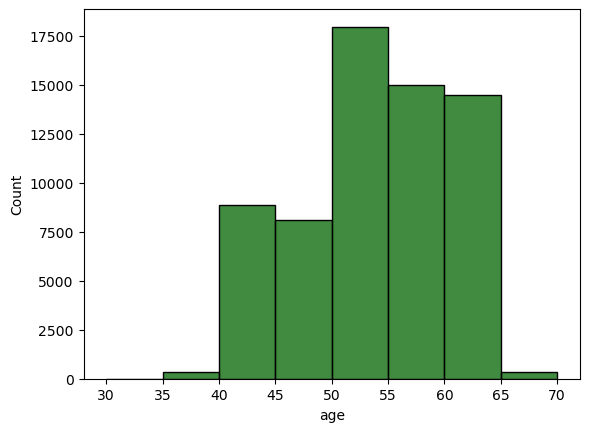

In [52]:
# Age distribution
sns.histplot(x='age', data = df, bins = [30,35,40,45,50,55,60,65,70], color = 'darkgreen')

## Multivariate Analysis

Let's look at some attributes and how are they spread among target class.  
For example, at what age does the number of people with CVD exceed the number of people without CVD? OR Does gender influence the likelihood of developing cardiovascular disease (CVD)?

### Hypothesis
  
### Hypothesis-1: Gender do not influence the likelihood of either developing or not developing cardiovascular disease (CVD).  
  
### Hypothesis-2: Smoking can damage the heart, arteries, and blood vessels, increasing the risk of heart disease and stroke increasing chances of CVD.  
  
### Hypothesis-3: Alcohol can increase blood pressure, weaken heart muscles, and cause heart failure. It can also lead to irregular heartbeats, which can be linked to sudden death increasing risk of CVD.
    
### Hypothesis-4: Physical inactivity is a significant risk factor for CVD as people who are not active tend to be obese and weak which can mean poor heart health and can be a reason for CVD.  
  
### Hypothesis-5: High levels of cholesterol can increase your risk of heart disease.

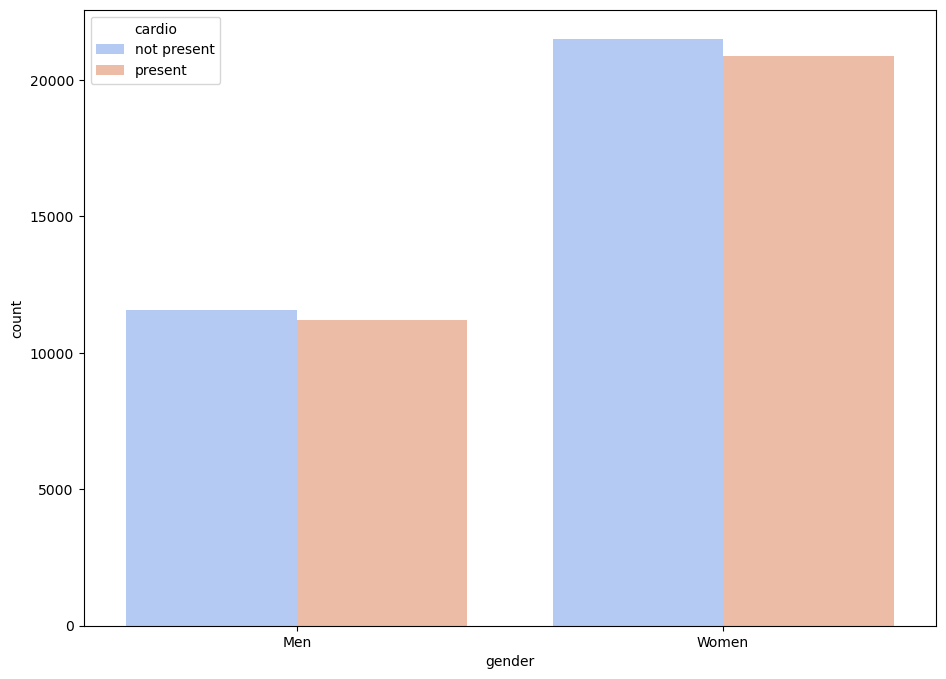

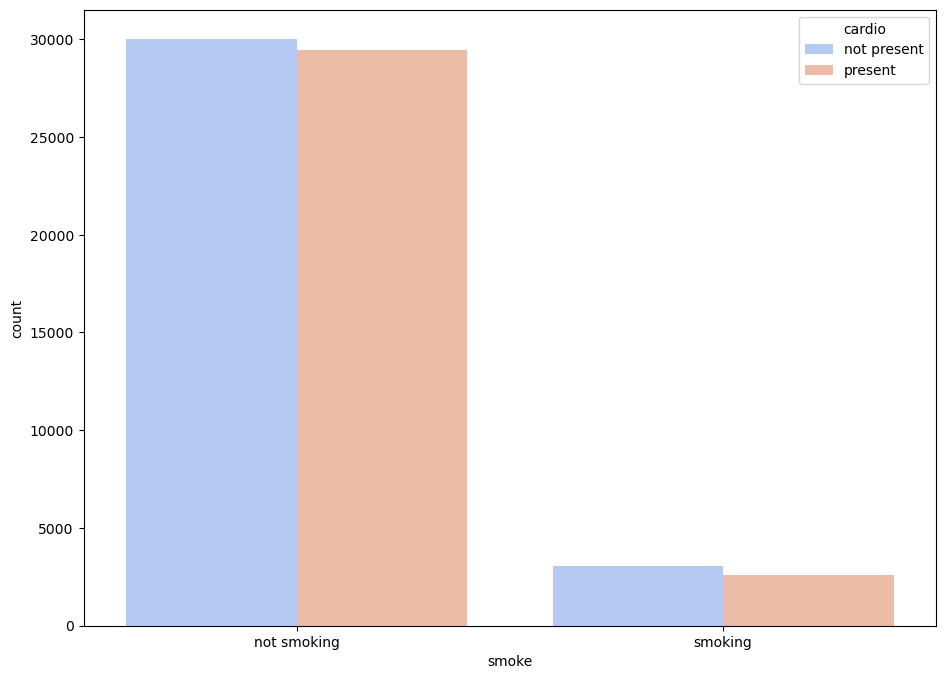

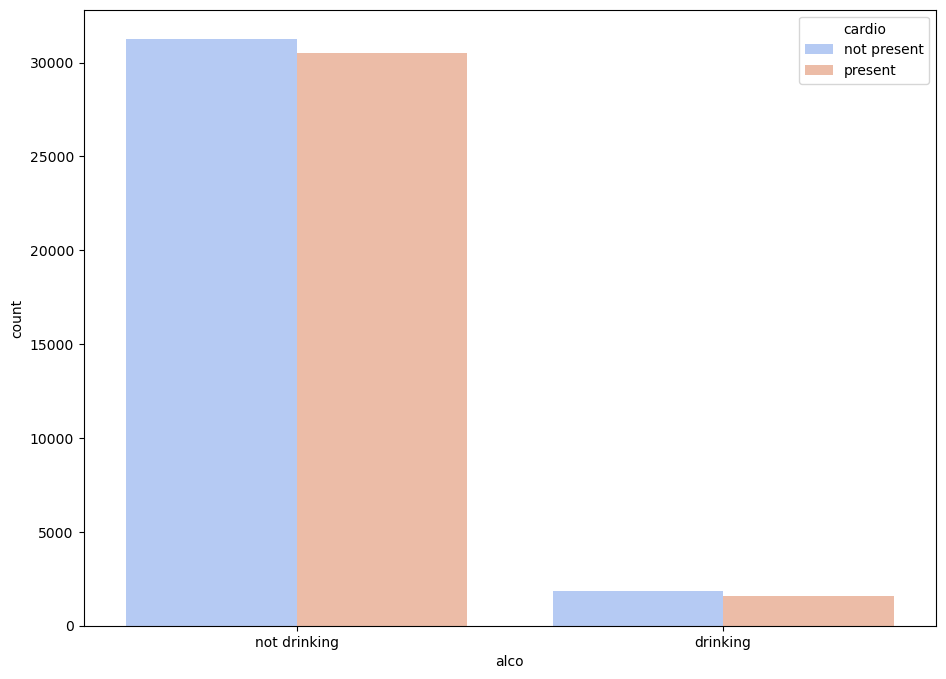

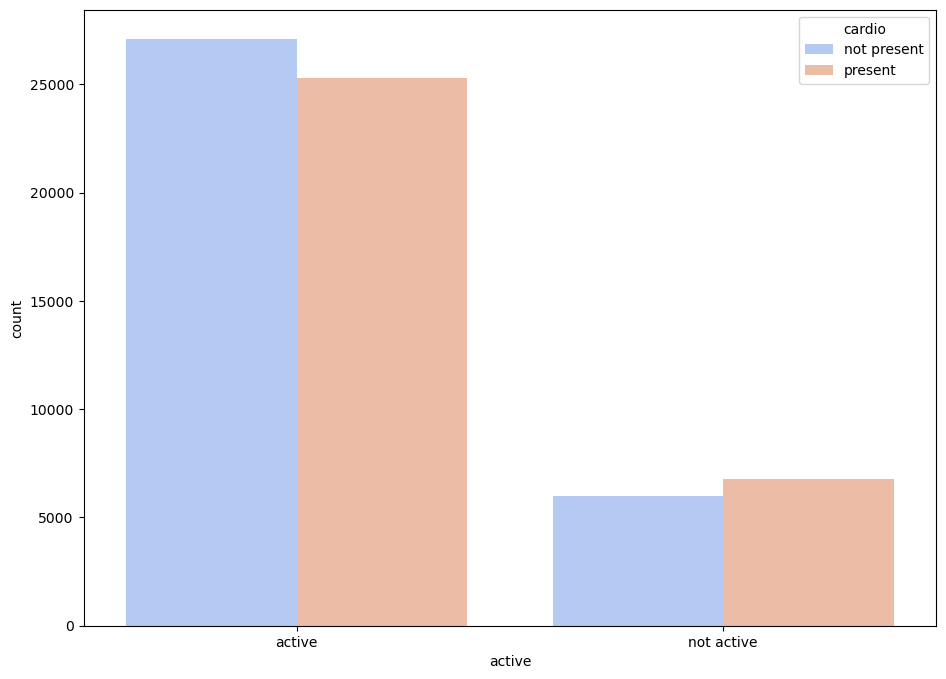

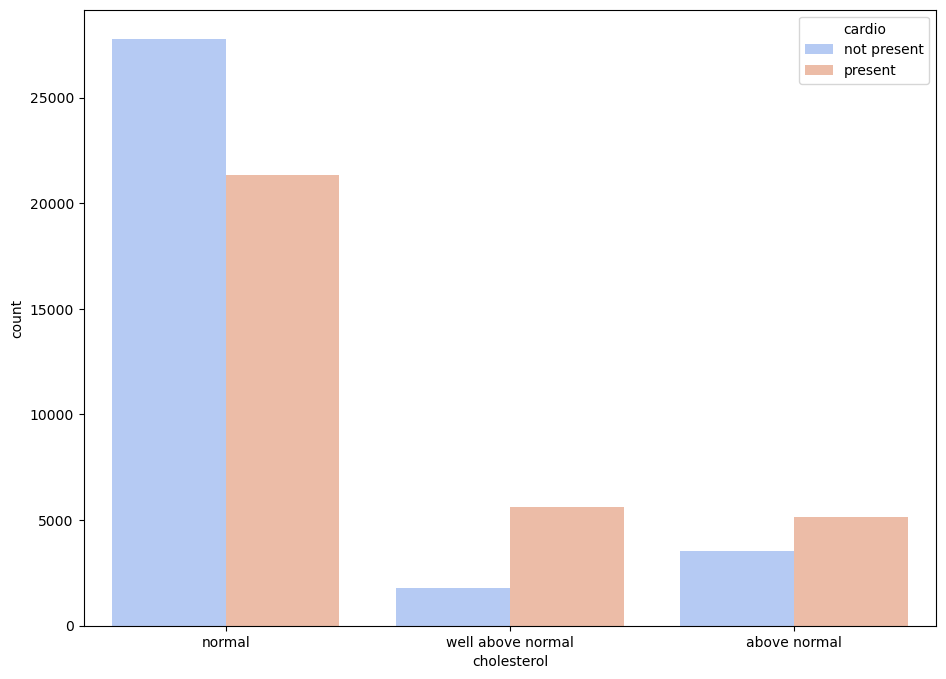

In [53]:
cat_cols = ['gender', 'smoke', 'alco', 'active', 'cholesterol']

for i in cat_cols:
  plt.figure(figsize=(11,8))
  sns.countplot(x=i, hue='cardio', data = df, palette="coolwarm")
  plt.show()

### Conclusion
  
### Conclusion-1: Gender does not seem to influence the likelihood of cardiovascular disease, as nearly equal numbers of men and women are affected so our hypothesis is correct.  
  
### Conclusion-2: Contrary to common belief, smoking does not appear to influence the likelihood of developing cardiovascular disease, which means our hypothesis is incorrect. This outcome may also be due to the fact that we only have 70,000 instances, and this dataset may not accurately represent the entire population.
  
### Conclusion-3:  Contrary to common belief, alcohol does not seem to influence the likelihood of developing cardiovascular disease, suggesting that our hypothesis may be incorrect. This outcome could also be attributed to the small number of participants who consume alcohol in our dataset. It’s possible that those who do drink are doing so responsibly, considering their health, since overconsumption of alcohol can deteriorate health..  
  
### Conclusion-4: Physical activity does not appear to have a significant impact on the occurrence of cardiovascular disease (CVD), since the difference in CVD rates between active and inactive individuals is minor, so we cannot confidently say that our hypothesis is correct.  
  
### Conclusion: It is clearly evident from the plot that individuals with normal cholesterol levels are significantly less prone to cardiovascular disease (CVD). The likelihood of developing CVD increases as cholesterol levels rise above normal, and it is almost certain that one will have CVD if their cholesterol level is classified as well above normal.

### Hypothesis: As age increases, the likelihood of developing cardiovascular disease (CVD) also increases

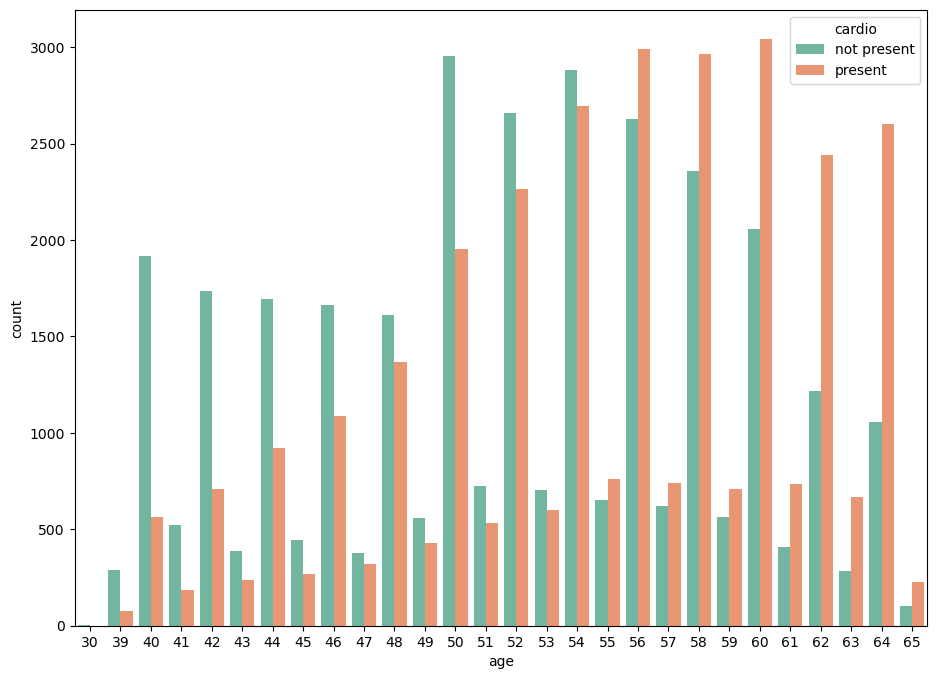

In [54]:
# Column plot of age
plt.figure(figsize=(11,8))
sns.countplot(x='age', hue='cardio', data = df, palette="Set2");

<Axes: xlabel='age', ylabel='count'>

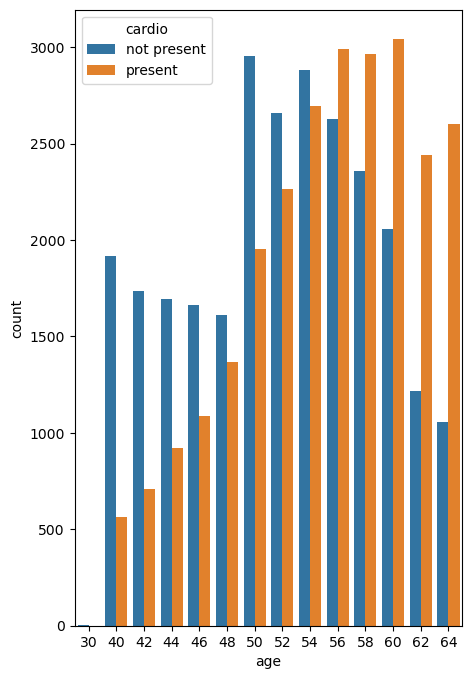

In [55]:
# Filter the data for even ages
even_ages_df = df[df['age'] % 2 == 0]
odd_ages_df = df[df['age'] % 2 == 1]

# Create the plots
plt.figure(figsize=(11, 8))

# Plot for even ages
plt.subplot(1, 2, 1)
sns.countplot(x='age', hue='cardio', data=even_ages_df)

<Axes: xlabel='age', ylabel='count'>

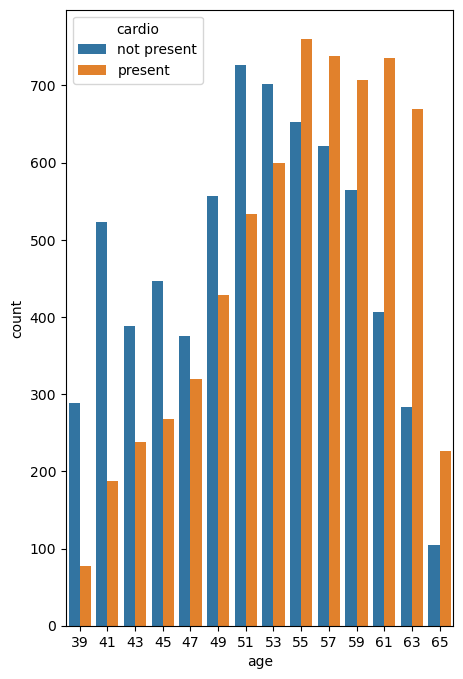

In [56]:
# Filter the data for odd ages
even_ages_df = df[df['age'] % 2 == 0]
odd_ages_df = df[df['age'] % 2 == 1]

# Create the plots
plt.figure(figsize=(11, 8))

# Plot for even ages
plt.subplot(1, 2, 1)
sns.countplot(x='age', hue='cardio', data=odd_ages_df)

Text(0.5, 1.0, 'Distribution of Age (in Years) for each Cardio Category')

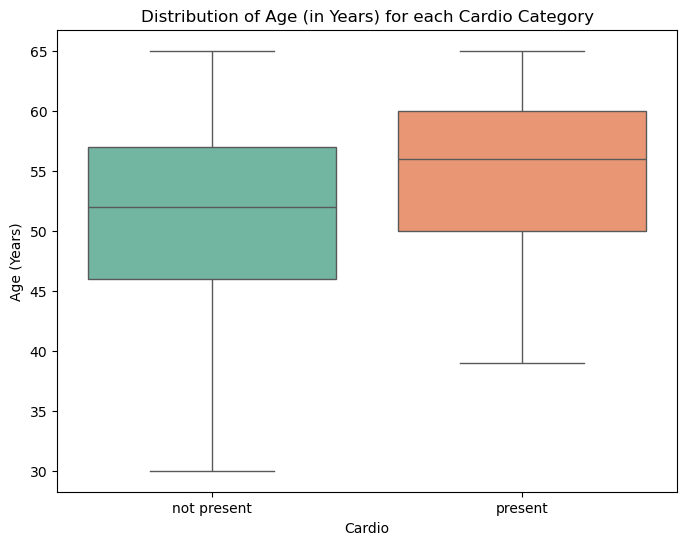

In [57]:
# Box plot of age v/s cardio
plt.figure(figsize=(8, 6))
sns.boxplot(x='cardio', y='age', hue='cardio', data=df, palette = 'Set2')

plt.xlabel('Cardio')
plt.ylabel('Age (Years)')
plt.title('Distribution of Age (in Years) for each Cardio Category')

### Conclusion: Thus, our hypothesis is correct as it can be observed that people over the age of 55 are more susceptible to cardiovascular disease (CVD). The reason for plotting separate graphs for even and odd-aged people is that there are fewer odd-aged individuals, making it unclear if the prevalence of CVD increases with age from the countplot, And from the box plot it is also evident that the Low(Q1 - 1.5* IQR) and median people having CVD is greater than those who don't suffer from it.Overall, it is evident that the likelihood of developing CVD increases with age.

### Hypothesis: As a person's BMI increases beyond a threshold, we can infer that their health condition is not optimal, putting them at a higher risk of cardiovascular disease (CVD).

In [58]:
# BMI (kg/m²) = (weight in kg) / (height Convert it from cm to m)²
df['bmi'] = ((df['weight']) / ((df['height']*0.01) ** 2)).round(2)


<Axes: xlabel='bmi', ylabel='Count'>

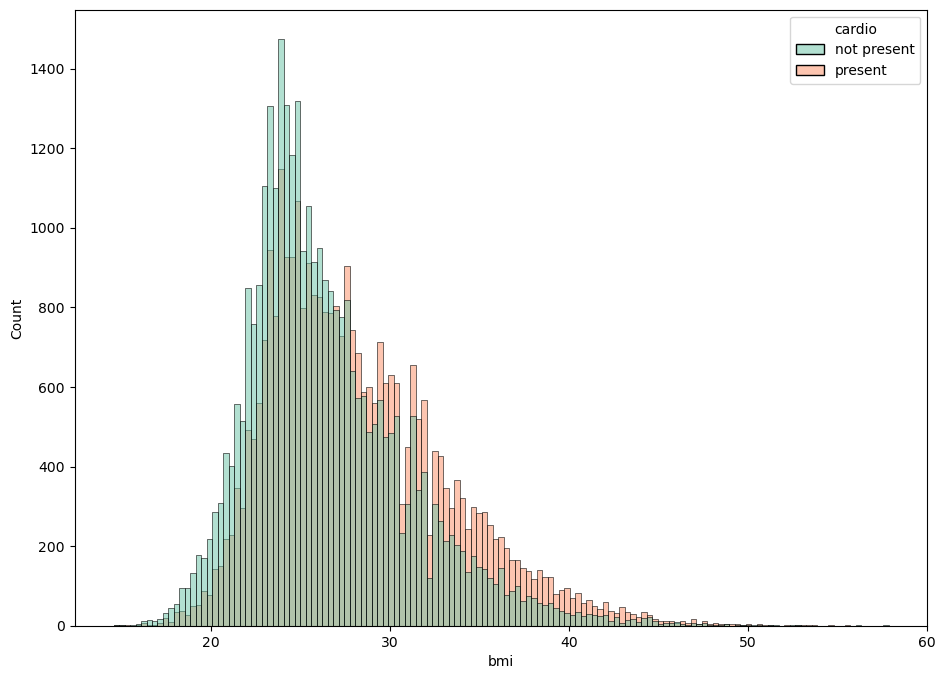

In [59]:
plt.figure(figsize=(11,8))
sns.histplot(x='bmi', hue='cardio', data = df, palette="Set2")

### Conclusion: From the plot, we can conclude that our hypothesis is correct. As BMI exceeds a certain threshold (27), the proportion of individuals with CVD increases as compared to pople with BMI less than that, indicating deteriorating health.

# Label Encoding

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['cholesterol'] = le.fit_transform(df['cholesterol'])
df['gluc'] = le.fit_transform(df['gluc'])
df['smoke'] = le.fit_transform(df['smoke'])
df['alco'] = le.fit_transform(df['alco'])
df['active'] = le.fit_transform(df['active'])
df['cardio'] = le.fit_transform(df['cardio']).astype(int)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,0,168,62.0,110,80,1,1,0,1,0,0,21.97
1,55,1,156,85.0,140,90,2,1,0,1,0,1,34.93
2,52,1,165,64.0,130,70,2,1,0,1,1,1,23.51
3,48,0,169,82.0,150,100,1,1,0,1,0,1,28.71
4,48,1,156,56.0,100,60,1,1,0,1,1,0,23.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,54,1,172,70.0,130,90,1,1,0,1,0,1,23.66
69994,58,1,165,80.0,150,80,1,1,0,1,0,1,29.38
69995,53,0,168,76.0,120,80,1,1,1,1,0,0,26.93
69998,61,1,163,72.0,135,80,1,0,0,1,1,1,27.10


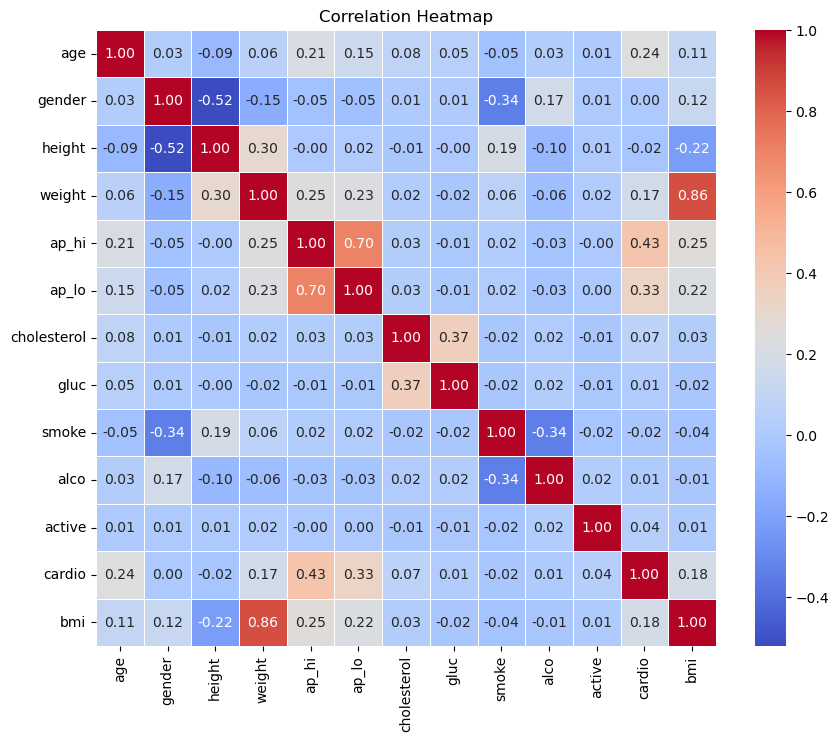

In [61]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')

plt.show()

Conclusion: It can be seen that most of the variables are uncorrelated that is because they are categorical and are converted to numerical using label encoding do their association can be interpreted properly by correlation we need to use Spearman's Rank Correlation (for ordinal variables) which correctly deceipts the nature of chnage of categorical variable with respect to numerical variable but that is beyond our understanding as of now so from this correlation matrix we can atleast se how numeric attributes like age, weight and height are correlacted with each other.


In [62]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,0,168,62.0,110,80,1,1,0,1,0,0,21.97
1,55,1,156,85.0,140,90,2,1,0,1,0,1,34.93
2,52,1,165,64.0,130,70,2,1,0,1,1,1,23.51
3,48,0,169,82.0,150,100,1,1,0,1,0,1,28.71
4,48,1,156,56.0,100,60,1,1,0,1,1,0,23.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,54,1,172,70.0,130,90,1,1,0,1,0,1,23.66
69994,58,1,165,80.0,150,80,1,1,0,1,0,1,29.38
69995,53,0,168,76.0,120,80,1,1,1,1,0,0,26.93
69998,61,1,163,72.0,135,80,1,0,0,1,1,1,27.10


In [63]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'bmi'],
      dtype='object')

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [79]:
# Assuming you have numerical columns defined
numerical_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']  # Define your numerical columns here

# Preprocessor - Standard Scaling for numerical columns
preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), numerical_cols)],
    remainder='passthrough'  # Leave other columns as they are 
)

In [80]:
# Splitting dataset
X = df.drop(columns=["cardio"])
y = df["cardio"]

In [81]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
# Pipeline for Decision Tree (with scaling)
dt_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', DecisionTreeClassifier(criterion='gini', max_depth=10))
])

# Pipeline for Random Forest (with scaling)
rf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Pipeline for Logistic Regression (with scaling)
lr_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Pipeline for KNN (with scaling)
knn_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Define the parameter grid for Random Forest, Logistic Regression, and KNN
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [10, 20, 30],
    'classifier__criterion': ['gini', 'entropy']
}

param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga']
}

param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance']
}


In [85]:
# Fit the grid search to the training data for Random Forest, Logistic Regression, and KNN
grid_search_rf.fit(X_train, y_train)
grid_search_lr.fit(X_train, y_train)
grid_search_knn.fit(X_train, y_train)

# Get the best parameters and best accuracy score from the grid search
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print(f"Best Random Forest Parameters: {best_params_rf}")
print(f"Best Random Forest CV Accuracy: {best_score_rf:.4f}")

print(f"Best Logistic Regression Parameters: {best_params_lr}")
print(f"Best Logistic Regression CV Accuracy: {best_score_lr:.4f}")

print(f"Best KNN Parameters: {best_params_knn}")
print(f"Best KNN CV Accuracy: {best_score_knn:.4f}")

# Evaluate the best models on the test set
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)

best_lr_model = grid_search_lr.best_estimator_
y_pred_lr = best_lr_model.predict(X_test)
test_accuracy_lr = accuracy_score(y_test, y_pred_lr)

best_knn_model = grid_search_knn.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)
test_accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"Test Set Accuracy with Best Random Forest Model: {test_accuracy_rf:.4f}")
print(f"Test Set Accuracy with Best Logistic Regression Model: {test_accuracy_lr:.4f}")
print(f"Test Set Accuracy with Best KNN Model: {test_accuracy_knn:.4f}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Random Forest Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__n_estimators': 100}
Best Random Forest CV Accuracy: 0.7295
Best Logistic Regression Parameters: {'classifier__C': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best Logistic Regression CV Accuracy: 0.7196
Best KNN Parameters: {'classifier__n_neighbors': 9, 'classifier__weights': 'uniform'}
Best KNN CV Accuracy: 0.7069
Test Set Accuracy with Best Random Forest Model: 0.7311
Test Set Accuracy with Best Logistic Regression Model: 0.7221
Test Set Accuracy with Best KNN Model: 0.7085


In [86]:
# GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_lr = GridSearchCV(estimator=lr_pipeline, param_grid=param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_knn = GridSearchCV(estimator=knn_pipeline, param_grid=param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Ensemble techniques
voting_clf_hard = VotingClassifier(estimators=[
    ('rf', best_rf_model), ('lr', best_lr_model), ('knn', best_knn_model)], voting='hard')

voting_clf_soft = VotingClassifier(estimators=[
    ('rf', best_rf_model), ('lr', best_lr_model), ('knn', best_knn_model)], voting='soft')

# Bagging with Decision Trees
bagging_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, bootstrap=True)

# Pasting with Decision Trees
pasting_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, bootstrap=False)

# AdaBoost
adaboost_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=100, learning_rate=0.5)

# Gradient Boosting
gboost_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[('rf', best_rf_model), ('lr', best_lr_model), ('knn', best_knn_model)],
    final_estimator=LogisticRegression()
)

In [87]:
# Loop through each model and fit to the training data, then evaluate on test data
models = [voting_clf_hard, voting_clf_soft, bagging_clf, pasting_clf, adaboost_clf, gboost_clf, stacking_clf]
model_names = ['Voting Hard', 'Voting Soft', 'Bagging', 'Pasting', 'AdaBoost', 'GradientBoosting', 'Stacking']

for model, name in zip(models, model_names):
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy, confusion matrix, precision, recall, and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics of the model
    print(f"{name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Confusion Matrix:\n{conf_matrix}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}\n")

Voting Hard:
  Accuracy: 0.7304
  Confusion Matrix:
[[5323 1299]
 [2215 4197]]
  Precision: 0.7636
  Recall: 0.6546
  F1 Score: 0.7049

Voting Soft:
  Accuracy: 0.7279
  Confusion Matrix:
[[5213 1409]
 [2137 4275]]
  Precision: 0.7521
  Recall: 0.6667
  F1 Score: 0.7068

Bagging:
  Accuracy: 0.6889
  Confusion Matrix:
[[4632 1990]
 [2065 4347]]
  Precision: 0.6860
  Recall: 0.6779
  F1 Score: 0.6819

Pasting:
  Accuracy: 0.6308
  Confusion Matrix:
[[4336 2286]
 [2526 3886]]
  Precision: 0.6296
  Recall: 0.6061
  F1 Score: 0.6176



c:\Users\Hardik Bharvada\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost:
  Accuracy: 0.7233
  Confusion Matrix:
[[5384 1238]
 [2369 4043]]
  Precision: 0.7656
  Recall: 0.6305
  F1 Score: 0.6915

GradientBoosting:
  Accuracy: 0.7299
  Confusion Matrix:
[[5185 1437]
 [2083 4329]]
  Precision: 0.7508
  Recall: 0.6751
  F1 Score: 0.7110

Stacking:
  Accuracy: 0.7292
  Confusion Matrix:
[[5229 1393]
 [2137 4275]]
  Precision: 0.7542
  Recall: 0.6667
  F1 Score: 0.7078



# Documentation

**Data Scraping and Pre-Processing**  
**Loading Data**:  
Read cardiovascular disease (CVD) data from a CSV file into a DataFrame scrapped from Kaggle.  
  
**Feature Engineering**:   
Convert weight from pounds (lbs) to kilograms (kg) and height from feet to centimeters (cm).  
Convert age from days to years.  
Calculate the Body Mass Index (BMI) using the formula: (weight[kg])/(height[cm]*0.01)^2   

**Data Cleaning**:  
Drop unnecessary columns, such as 'id'.  
Remove outliers based on specified quantiles for height, weight, and blood pressure.  
Handle inaccurate records where diastolic pressure exceeds systolic pressure.  

**Exploratory Data Analysis (EDA)**:  
Visualize distributions of weight, height, and age using histogram and box plots for univariate analysis.  
Also BMI and other categorical attributes like gender, smoking, alcohol consumption, physical activity, and cholesterol using count plots, colored by the presence of CVD.  
Generate correlation heatmap to explore relationships between features.  

**Model Training**  

**Data Preparation for Modeling**:  
Encode categorical variables using LabelEncoder.  
Split the dataset into training and testing sets.  

**Model Training and Validation**:  
Use pipelines with standard scaling for numerical features.  
Apply GridSearchCV to optimize hyperparameters for Random Forest, Logistic Regression, and KNN models.  
Evaluate model performance using cross-validation scores.  

**Ensemble Techniques and Models**:  
In addition to the individual models, you can also explore ensemble techniques and models, such as:  
Voting Classifier (Hard and Soft)  
Bagging Classifier  
Pasting Classifier  
AdaBoost Classifier  
Gradient Boosting Classifier  
Stacking Classifier  
These ensemble methods can potentially improve the overall model performance by combining the strengths of multiple base models.  

**Model Evaluation**:  
Calculate evaluation metrics (accuracy, precision, recall, F1 score) on the test set for each model.  
Analyze confusion matrices to assess classification performance.  
By following this workflow, we can effectively analyze the cardiovascular disease dataset, pre-process the data, perform exploratory analysis, train and optimize various models, and evaluate their performance to gain insights into the factors influencing cardiovascular disease.